# March Madness Machine Learning Project

Autor: Dominik Babić

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Učitavanje podataka

Postoje mnoge March Madness baza podataka, a neke od koji sam ja odabrao za proučavanje su https://www.kaggle.com/competitions/march-machine-learning-mania-2014, https://www.kaggle.com/competitions/march-machine-learning-mania-2023 i https://www.kaggle.com/datasets/nishaanamin/march-madness-data/data

Trenutno ćemo koristiti podatke sa zadnjeg linka jer sadrži podatke od 2008-2023, s time da su podaci za 2023. u odvojenom csv-u.
Podatke nabavite preko Kaggle-a jer su datoteke prevelike za prijenos na GitHub.

In [4]:

conf_data = pd.read_csv('march-madness-data/Tournament Conference Data.csv')
game_data = pd.read_csv('march-madness-data/Tournament Game Data.csv')
tournament_team_data = pd.read_csv('march-madness-data/Tournament Team Data (Including 2023).csv')
tournament_trends = pd.read_csv('march-madness-data/Tournament Trends.csv')

### Opisi sljedećih baza podataka su:
 - Tournament Conference Data - Ovaj skup podataka sadrži informacije o konferencijama i njihovim statistikama za sve turnire od 2008. godine. Sve navedene statistike predstavljaju prosječne vrijednosti konferencije tijekom cijele sezone, uključujući i konferencijske turnire. Također sadrži informacije o uspješnosti svake konferencije na turniru, prikazujući koliko je momčadi iz te konferencije stiglo do određenih faza turnira.

 - Tournament Game Data - Ovaj skup podataka sadrži potencijalne mečeve za prošle turnire od 2008. godine. Uključuje sve mečeve Prve runde, uobičajene mečeve Druge runde i uobičajene mečeve Osmine finala. Ovaj skup podataka stvoren je za predviđanje rezultata ovih određenih mečeva u momčadskom bilježniku za ožujak. Svake dvije retke predstavljaju jedan meč. Na primjer, prve dvije retke (Gonzaga i Georgia St.) predstavljaju meč između ta dva tima. Sljedeće retke (Boise St. i Memphis) predstavljaju meč između druga dva tima i tako dalje. Sve navedene statistike predstavljaju prosječne vrijednosti tima tijekom cijele sezone, uključujući i njihov konferencijski turnir.

 - Tournament Team Data - Ovaj skup podataka sadrži informacije o timovima i njihovim statistikama za turnir iz 2023. godine i prethodne timove od 2008. godine. Sve navedene statistike predstavljaju prosječne vrijednosti tima tijekom cijele sezone, uključujući i njihov konferencijski turnir. Ovaj skup podataka rezultat je spajanja "Tournament Data.csv" i "2023 Tournament Team Data.csv".

 - Tournament Trends - Ovaj skup podataka sadrži informacije o timovima i nekim specifičnim statistikama za timove na turniru od 2008. godine. Sve navedene statistike predstavljaju prosječne vrijednosti tima tijekom cijele sezone, uključujući i njihov konferencijski turnir. Statistike poput Poena po utakmici, Postotka pobjeda (u tijesnim utakmicama), Postotka pobjeda u gostima, Postotka pobjeda na neutralnom terenu, Postotka pobjeda u gostima i na neutralnom terenu, te Razlike u skoru odnose se na timove koji su stigli do Završnice i dalje. Razlike u rangiranju ofenzive i defenzive (BADJ O Rank Difference i BADJ D Rank Difference) odnose se na timove koji imaju razliku od 30 ili više u rangiranju ofenzive/defenzive. Postotak izgubljenih lopti (TOV % i TOV % Rank) odnosi se na timove koji imaju postotak izgubljenih lopti veći od ili jednak 18 %. Postotak trica (3PT % i 3PT % Defense) odnosi se na timove koji pucaju 33 % ili manje izvan linije za tri poena.


In [5]:
conf_data_2023 = pd.read_csv('march-madness-data/2023 Conference Data.csv')
game_data_2023 = pd.read_csv('march-madness-data/2023 Game Data.csv')
tournamen_team_data_2023 = pd.read_csv('march-madness-data/2023 Tournament Data.csv')
tournament_trends_2023 = pd.read_csv('march-madness-data/2023 Tournament Trends.csv')

In [6]:
conf_data.info()
conf_data["YEAR"].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            133 non-null    int64  
 1   CONFERENCE      133 non-null    object 
 2   B ADJ EM        133 non-null    float64
 3   B ADJ O         133 non-null    float64
 4   B ADJ D         133 non-null    float64
 5   BARTHAG         133 non-null    float64
 6   WAB             133 non-null    float64
 7   CHAMP COUNT     133 non-null    int64  
 8   FINALS COUNT    133 non-null    int64  
 9   FINAL 4 COUNT   133 non-null    int64  
 10  ELITE 8 COUNT   133 non-null    int64  
 11  SWEET 16 COUNT  133 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 12.6+ KB


2022

In [7]:
game_data.info()
game_data["YEAR"].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YEAR                            1910 non-null   int64  
 1   SEED                            1910 non-null   int64  
 2   TEAM                            1910 non-null   object 
 3   TEAM ROUND                      1910 non-null   int64  
 4   CURRENT ROUND                   1910 non-null   int64  
 5   KENPOM ADJUSTED EFFICIENCY      1910 non-null   float64
 6   KENPOM ADJUSTED OFFENSE         1910 non-null   float64
 7   KENPOM ADJUSTED DEFENSE         1910 non-null   float64
 8   KENPOM ADJUSTED TEMPO           1910 non-null   float64
 9   BARTTORVIK ADJUSTED EFFICIENCY  1910 non-null   float64
 10  BARTTORVIK ADJUSTED OFFENSE     1910 non-null   float64
 11  BARTTORVIK ADJUSTED DEFENSE     1910 non-null   float64
 12  BARTHAG                         19

2023

In [8]:
tournament_team_data.info()
tournament_team_data["YEAR"].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YEAR                            1011 non-null   int64  
 1   SEED                            1011 non-null   int64  
 2   TEAM                            1011 non-null   object 
 3   ROUND                           1011 non-null   int64  
 4   KENPOM ADJUSTED EFFICIENCY      1011 non-null   float64
 5   KENPOM ADJUSTED OFFENSE         1011 non-null   float64
 6   KENPOM ADJUSTED DEFENSE         1011 non-null   float64
 7   KENPOM ADJUSTED TEMPO           1011 non-null   float64
 8   BARTTORVIK ADJUSTED EFFICIENCY  1011 non-null   float64
 9   BARTTORVIK ADJUSTED OFFENSE     1011 non-null   float64
 10  BARTTORVIK ADJUSTED DEFENSE     1011 non-null   float64
 11  BARTHAG                         1011 non-null   float64
 12  ELITE SOS                       10

2023

In [9]:
tournament_trends.info()
tournament_trends["YEAR"].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     868 non-null    int64  
 1   SEED                     868 non-null    int64  
 2   TEAM                     868 non-null    object 
 3   ROUND                    868 non-null    int64  
 4   POINTS PER GAME          56 non-null     float64
 5   WIN % (CLOSE GAMES)      56 non-null     float64
 6   AWAY WIN %               56 non-null     float64
 7   NEUTRAL WIN %            56 non-null     float64
 8   AWAY - NEUTRAL WIN %     56 non-null     float64
 9   SCORING MARGIN           56 non-null     float64
 10  B ADJ O RANK DIFFERENCE  84 non-null     float64
 11  B ADJ D RANK DIFFERENCE  129 non-null    float64
 12  TOV %                    469 non-null    float64
 13  TOV % RANK               469 non-null    float64
 14  3PT %                    1

2022

U trenutnim podacima, zadnja godina mjerenja je 2022.

### Čišćenje podataka

Istražit ćemo koji podaci nam uzrokuju probleme i nad njima ćemo izvesti neku od određenih promjene:
    \li Izbacivanje retka 
    \li Izbacivanje značajke
    \li Popunjavanje nepostojećih vrijednosti

In [10]:
for i, data in enumerate([conf_data, game_data, tournament_team_data, tournament_trends]):
    for col in data.columns.values:
        if data[col].isnull().values.any():
            print(f"Data set: {i} -> za značajku {col} postoji { data[col].isnull().sum()} nedefiniranih vrijednosti od ukupno {data.size}")

Data set: 3 -> za značajku POINTS PER GAME postoji 812 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku WIN % (CLOSE GAMES) postoji 812 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku AWAY WIN % postoji 812 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku NEUTRAL WIN % postoji 812 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku AWAY - NEUTRAL WIN % postoji 812 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku SCORING MARGIN postoji 812 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku B ADJ O RANK DIFFERENCE postoji 784 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku B ADJ D RANK DIFFERENCE postoji 739 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku TOV % postoji 399 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku TOV % RANK postoji 399 nedefiniranih vrijednosti od ukupno 14756
Data set: 3 -> za značajku 3

Popunit ćemo nedostajuće vrijednosti s prosječnom vrijednosti

In [11]:
for col in tournament_trends.columns.values:
    if tournament_trends[col].isnull().values.any():
        tournament_trends[col].fillna(tournament_trends[col].mean(), inplace=True)


In [12]:
for i, data in enumerate([conf_data, game_data, tournament_team_data, tournament_trends]):
    print(f'#{i+1}\n{data.describe()}')

#1
              YEAR    B ADJ EM     B ADJ O     B ADJ D    BARTHAG         WAB  \
count   133.000000  133.000000  133.000000  133.000000  133.00000  133.000000   
mean   2014.398496   11.078947  108.171429   97.092481    0.76529   -1.966165   
std       4.221051    4.355996    2.827853    2.421890    0.08725    2.699239   
min    2008.000000    2.500000  102.600000   91.500000    0.56800   -7.600000   
25%    2011.000000    7.300000  105.900000   95.200000    0.69570   -4.400000   
50%    2014.000000   11.700000  108.400000   96.900000    0.79100   -1.600000   
75%    2018.000000   14.800000  110.100000   98.700000    0.83750    0.300000   
max    2022.000000   18.800000  114.800000  104.000000    0.89070    3.200000   

       CHAMP COUNT  FINALS COUNT  FINAL 4 COUNT  ELITE 8 COUNT  SWEET 16 COUNT  
count   133.000000    133.000000     133.000000     133.000000      133.000000  
mean      0.105263      0.210526       0.413534       0.796992        1.578947  
std       0.308052      

Kandidati za sadržavanje stršećih vrijednosti su "B ADJ O RANK DIFFERENCE" i "B ADJ D RANK DIFFERENCE" iz tournament_trends 

In [13]:
tournament_trends.loc[tournament_trends["B ADJ D RANK DIFFERENCE"] > 120 , "B ADJ D RANK DIFFERENCE"]

194    159.0
197    152.0
201    165.0
256    175.0
Name: B ADJ D RANK DIFFERENCE, dtype: float64

Moguće nekonzistentnosti su samo kod naziva timova, no lakom provjerom se pokaže da dekonzistentnosti u podacima ne postoje.

In [14]:
tournament_team_data['TEAM'].unique()

array(['Alabama', 'Houston', 'Kansas', 'Purdue', 'Arizona', 'Marquette',
       'Texas', 'UCLA', 'Baylor', 'Gonzaga', 'Kansas St.', 'Xavier',
       'Connecticut', 'Indiana', 'Tennessee', 'Virginia', 'Duke',
       'Miami FL', "Saint Mary's", 'San Diego St.', 'Creighton',
       'Iowa St.', 'Kentucky', 'TCU', 'Michigan St.', 'Missouri',
       'Northwestern', 'Texas A&M', 'Arkansas', 'Iowa', 'Maryland',
       'Memphis', 'Auburn', 'Florida Atlantic', 'Illinois',
       'West Virginia', 'Boise St.', 'Penn St.', 'USC', 'Utah St.',
       'Arizona St.', 'Mississippi St.', 'Nevada', 'North Carolina St.',
       'Pittsburgh', 'Providence', 'College of Charleston', 'Drake',
       'Oral Roberts', 'VCU', 'Furman', 'Iona', 'Kent St.',
       'Louisiana Lafayette', 'Grand Canyon', 'Kennesaw St.',
       'Montana St.', 'UC Santa Barbara', 'Colgate', 'Princeton',
       'UNC Asheville', 'Vermont', 'Fairleigh Dickinson', 'Howard',
       'Northern Kentucky', 'Southeast Missouri St.',
       'Texas

Izuzevši zamjene nedostajećih vrijednosti, nije bilo potrebe raditi daljnje promjene nad podacima.

# Vizualizacija

Vizualizaciju podataka ćemo izvesti nad podacima "game_data".

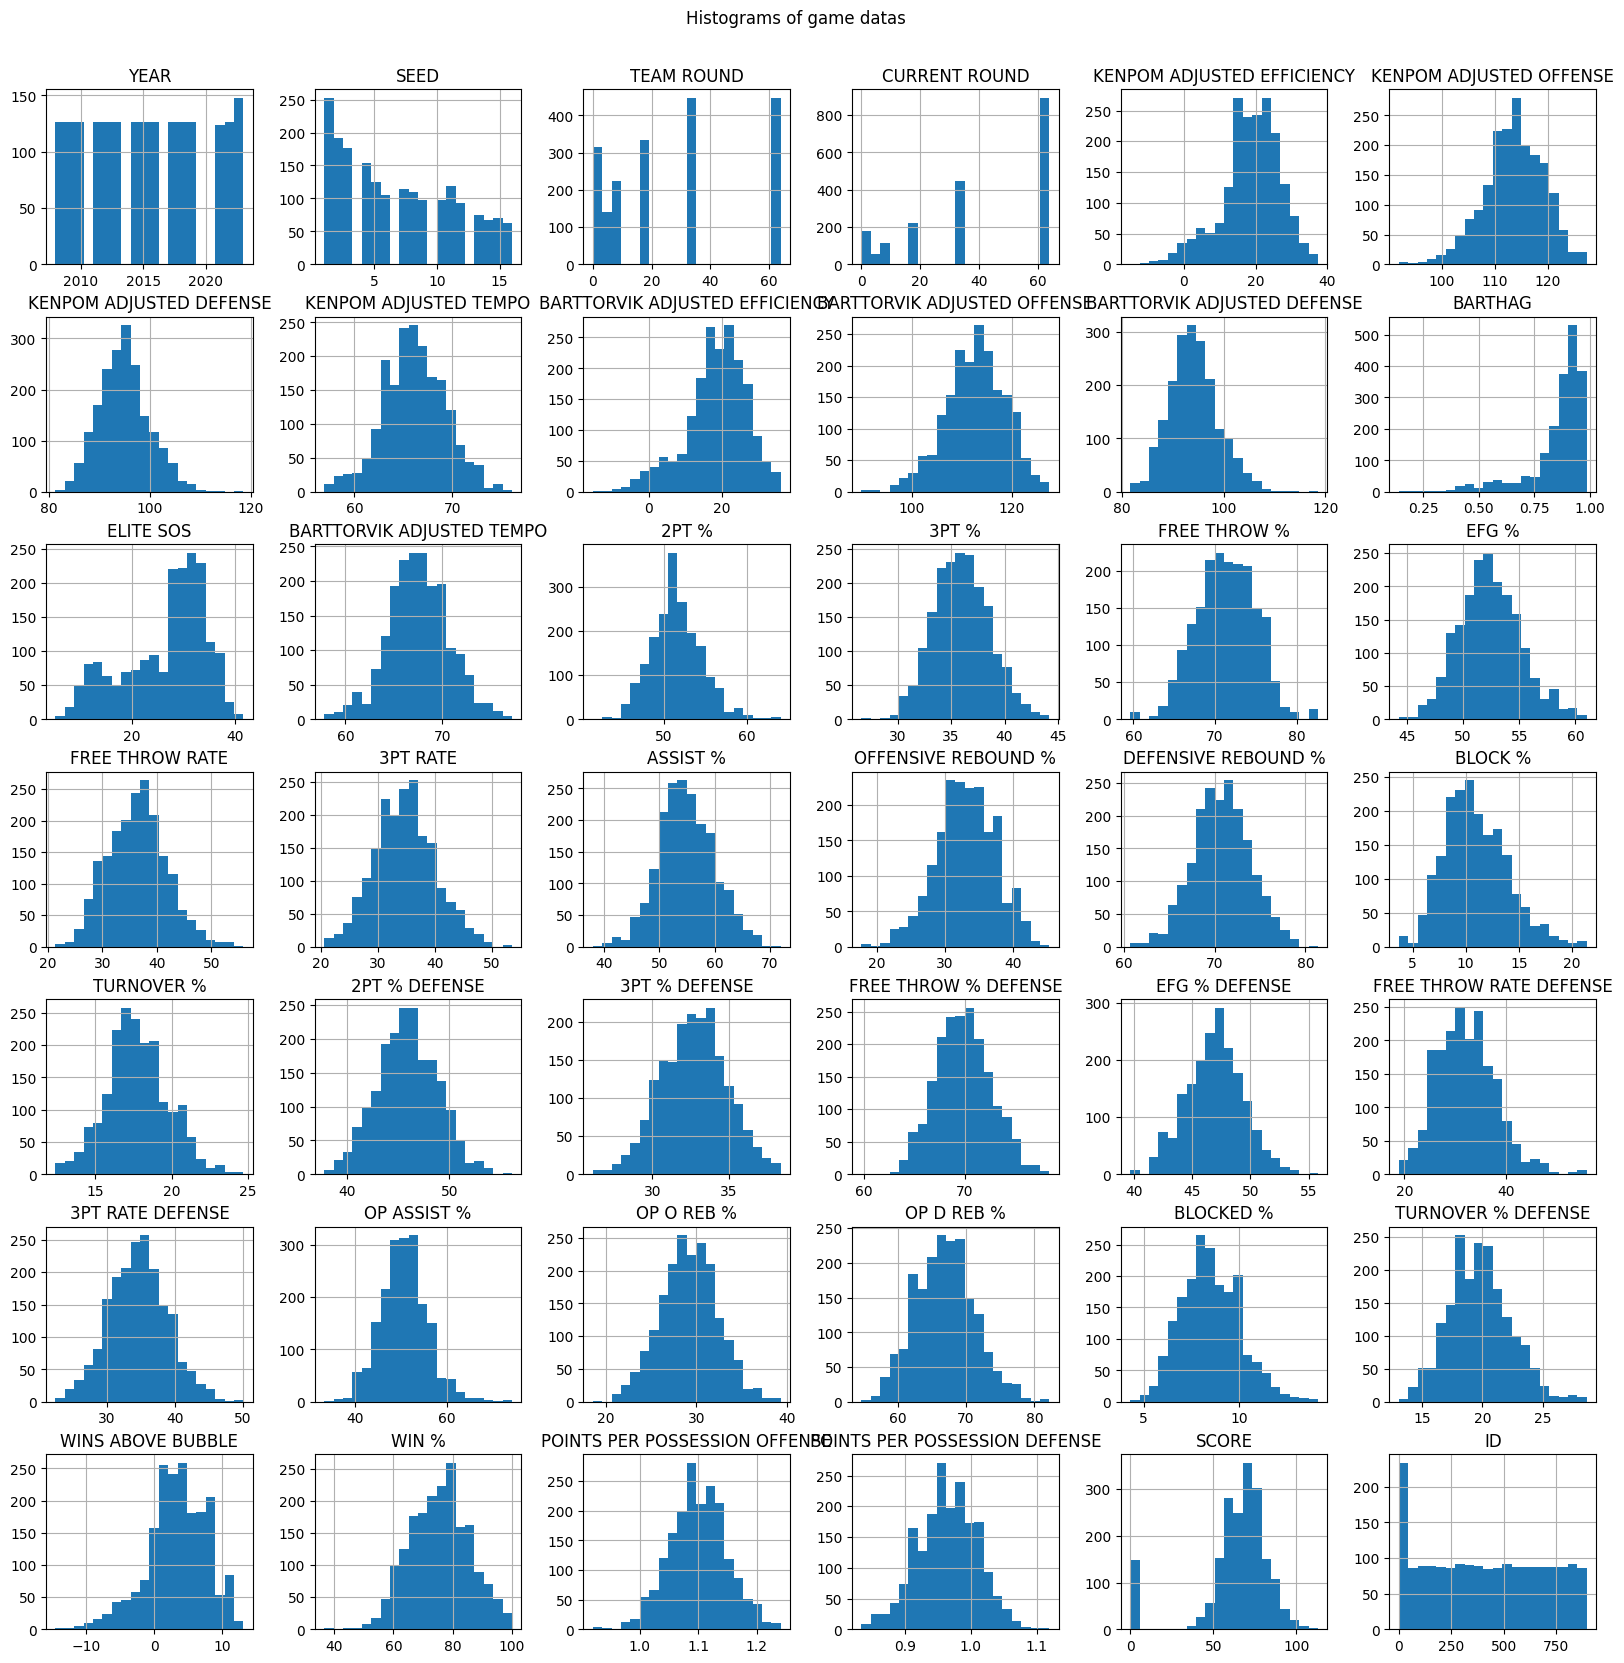

In [17]:
game_data.hist(figsize=(20, 20), bins=20)
plt.suptitle('Histogram podataka o igri', y=0.92)
plt.show()

Histogram za 'KENPOM ADJUSTED EFFICIENCY' pomaže u razumijevanju distribucije efikasnosti momčadi. Ako je histogram simetričan, možete zaključiti da su podaci ravnomjerno raspoređeni. Ako postoje izbočine ili grupiranja, to može ukazivati na specifične skupine momčadi koje izdvajaju.

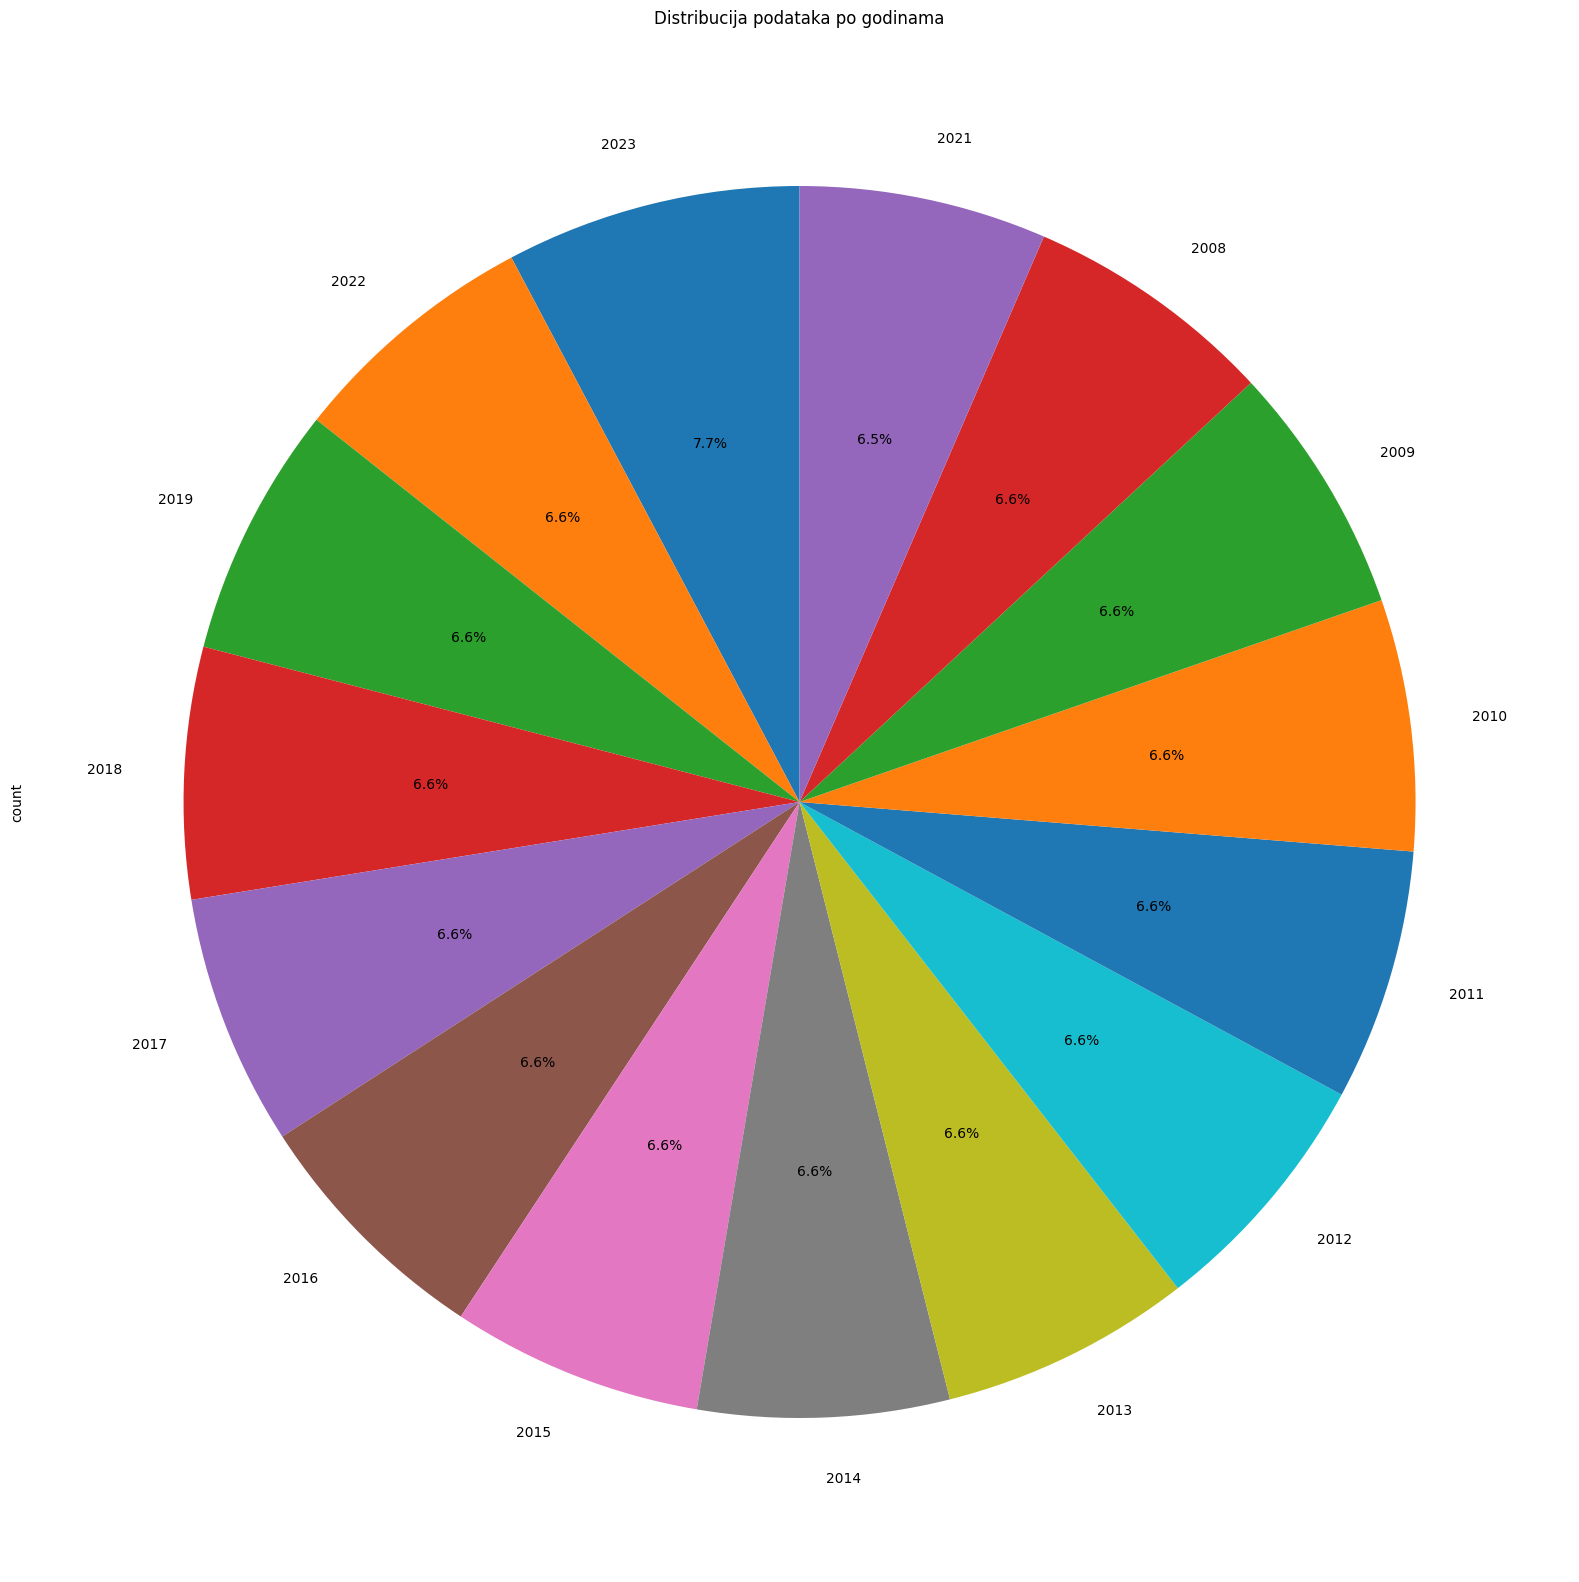

In [20]:
plt.figure(figsize=(20, 20))
game_data['YEAR'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribucija podataka po godinama')
plt.show()

Kružni dijagram za kategoriju 'YEAR' jasno pokazuje kako su podaci za svaku godinu jednako podijeljeni.

/tmp/ipykernel_23457/2048666542.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR', y='SCORE', data=data, ci=None)
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

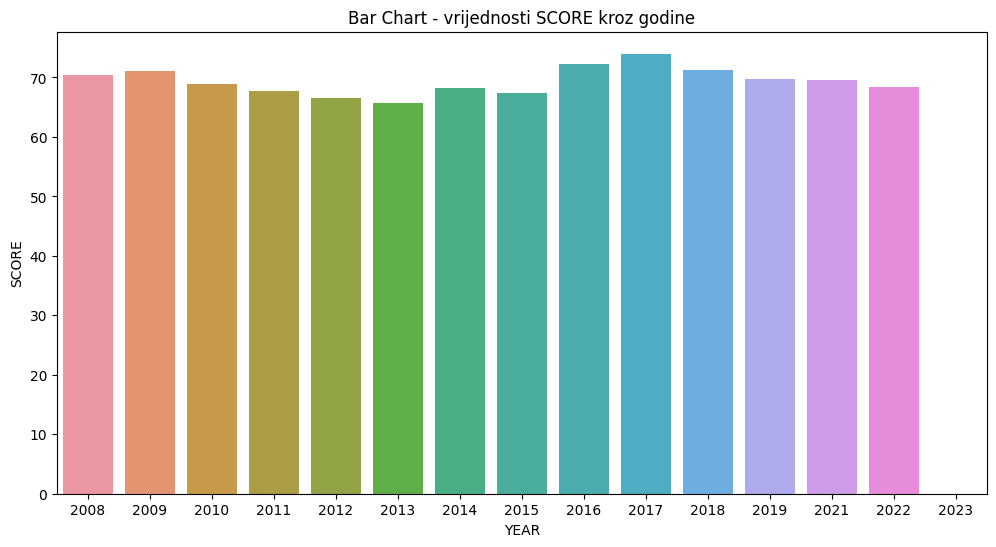

In [25]:
# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='SCORE', data=game_data, ci=None)
plt.title('Bar Chart - vrijednosti SCORE kroz godine')
plt.show()

Stupčasti grafikon za 'YEAR' i 'SCORE' omogućuje usporedbu ukupnih bodova postignutih kroz različite godine. Ako su neke godine značajno iznad ili ispod drugih, to može ukazivati na razlike u učinku.

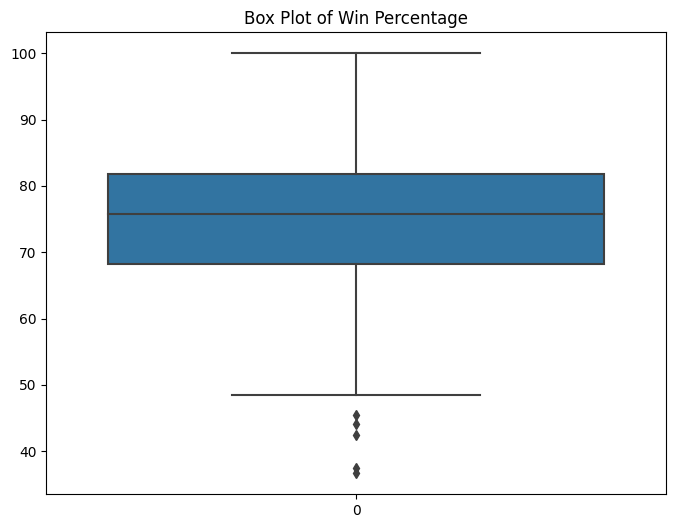

In [30]:
# Box plot for 'WIN %'
plt.figure(figsize=(8, 6))
sns.boxplot(game_data['WIN %'])
plt.title('Box Plot of Win Percentage')
plt.show()

Box plot za 'WIN %' pruža informacije o srednjoj vrijednosti, interkvartilnom rasponu te prisutnosti potencijalnih outliersa ili ekstremnih vrijednosti u podacima o postotku pobjeda.

/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

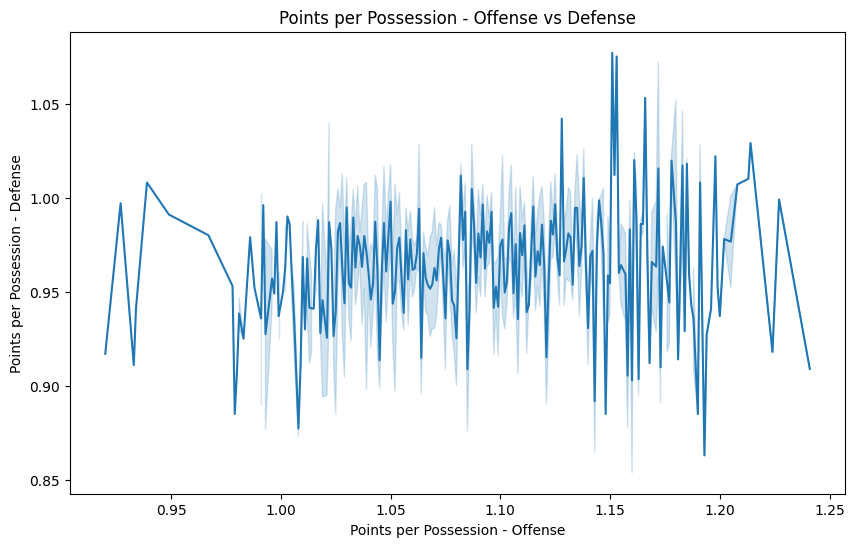

In [29]:
# Linear plot for 'POINTS PER POSSESSION OFFENSE' vs 'POINTS PER POSSESSION DEFENSE'
plt.figure(figsize=(10, 6))
sns.lineplot(x='POINTS PER POSSESSION OFFENSE', y='POINTS PER POSSESSION DEFENSE', data=game_data)
plt.title('Points per Possession - Offense vs Defense')
plt.xlabel('Points per Possession - Offense')
plt.ylabel('Points per Possession - Defense')
plt.show()

Linijski grafikon za 'POINTS PER POSSESSION OFFENSE' i 'POINTS PER POSSESSION DEFENSE' pomaže u praćenju trenda između bodova postignutih napadački i onih primljenih obrambeno. Ovo može otkriti kako efikasnost momčadi utječe na njezinu obranu.

/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


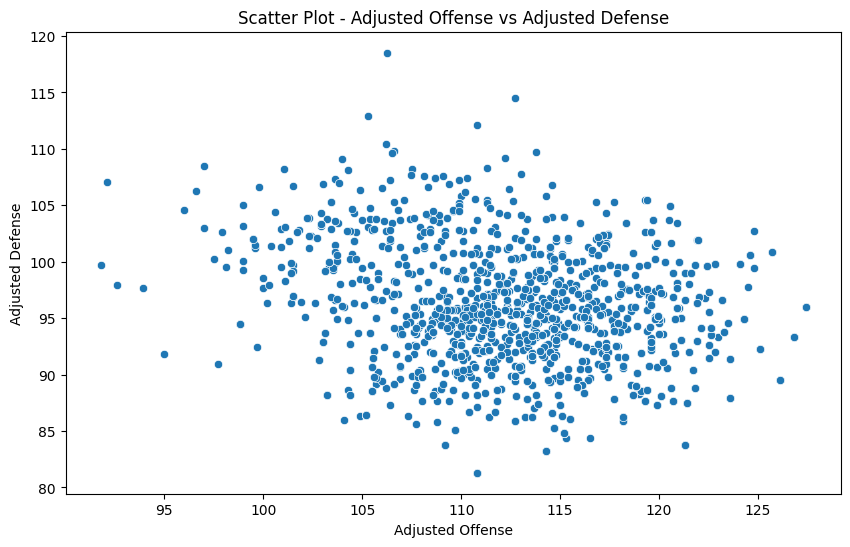

In [34]:
# Scatter plot for 'KENPOM ADJUSTED OFFENSE' vs 'KENPOM ADJUSTED DEFENSE'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KENPOM ADJUSTED OFFENSE', y='KENPOM ADJUSTED DEFENSE', data=game_data)
plt.title('Scatter Plot - Adjusted Offense vs Adjusted Defense')
plt.xlabel('Adjusted Offense')
plt.ylabel('Adjusted Defense')
plt.show()

Scatter plot za 'KENPOM ADJUSTED OFFENSE' i 'KENPOM ADJUSTED DEFENSE' prikazuje raspored efikasnosti napada i obrane za svaku momčad. To može pomoći u prepoznavanju eventualnih uzoraka ili odstupanja između tih dviju mjerenja.

/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

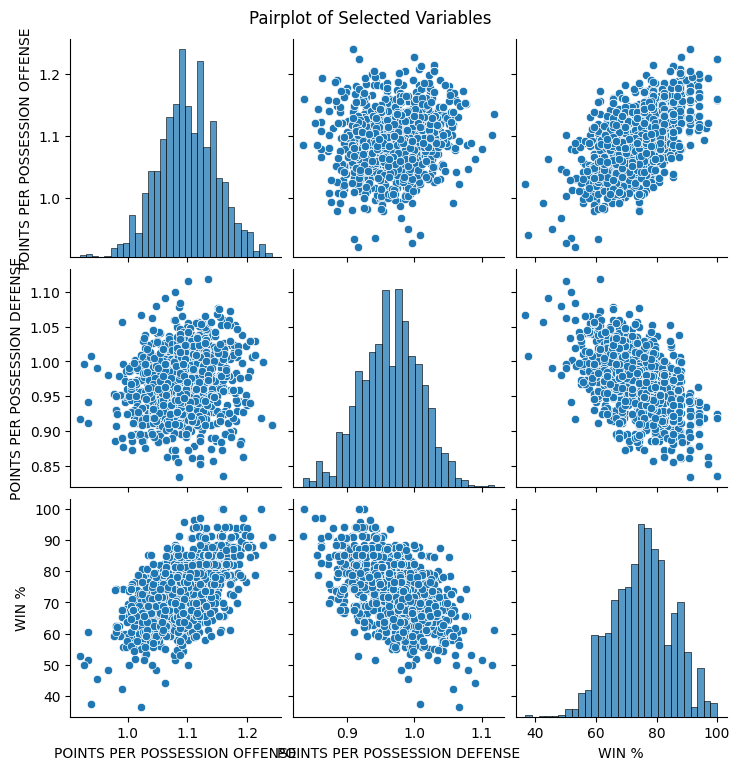

In [36]:
# Pairplot for selected numeric columns
sns.pairplot(game_data[['POINTS PER POSSESSION OFFENSE', 'POINTS PER POSSESSION DEFENSE', 'WIN %']])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

Pairplot prikazuje odnose između odabranih numeričkih stupaca, uključujući 'POINTS PER POSSESSION OFFENSE', 'POINTS PER POSSESSION DEFENSE' i 'WIN %'. Ovo vam omogućuje istraživanje više varijabli istodobno.

/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


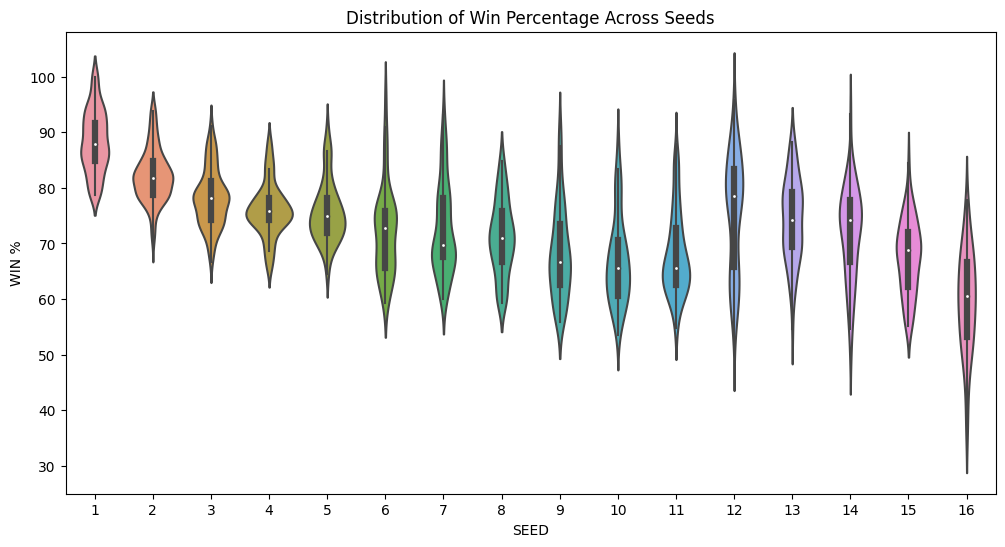

In [41]:
# Violin plot for distribution of 'WIN %' across different 'SEED'
plt.figure(figsize=(12, 6))
sns.violinplot(x='SEED', y='WIN %', data=game_data)
plt.title('Distribution of Win Percentage Across Seeds')
plt.show()


Violin plot za 'WIN %' prema 'SEED' pruža uvid u distribuciju postotka pobjeda za različite sjemenske pozicije. Može pomoći u prepoznavanju utjecaja sjemena na uspjeh momčadi.

/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

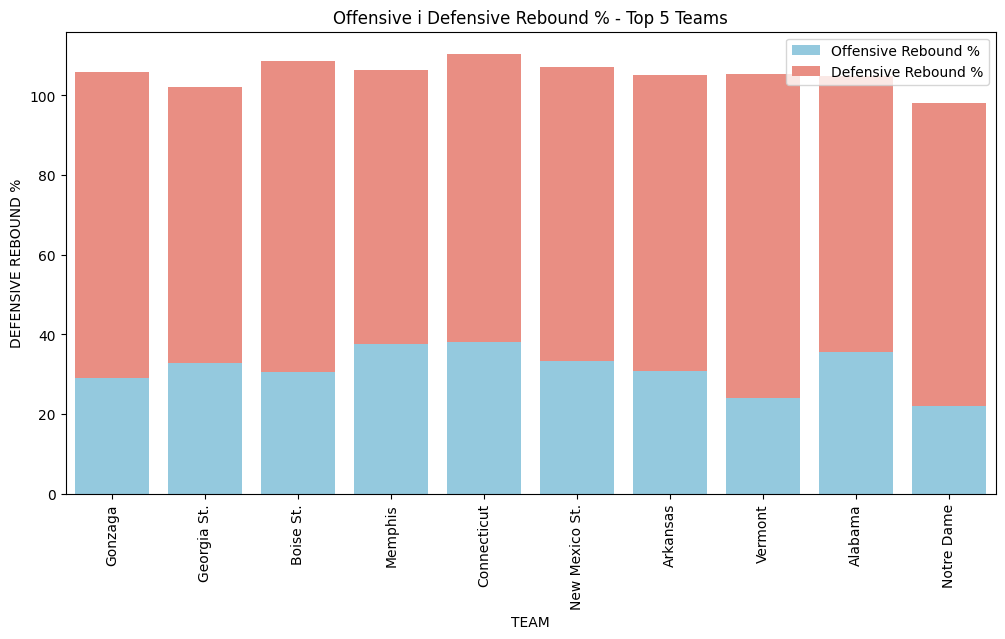

In [55]:
# Stacked bar chart for 'OFFENSIVE REBOUND %' and 'DEFENSIVE REBOUND %' - prvih 5 timova
top_teams_data = game_data.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='TEAM', y='OFFENSIVE REBOUND %', data=top_teams_data, color='skyblue', label='Offensive Rebound %')
sns.barplot(x='TEAM', y='DEFENSIVE REBOUND %', data=top_teams_data, color='salmon', label='Defensive Rebound %', bottom=top_teams_data['OFFENSIVE REBOUND %'])
plt.title('Offensive i Defensive Rebound % - Top 5 Teams')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Stupčasti grafikon s nakupljanjem za 'OFFENSIVE REBOUND %' i 'DEFENSIVE REBOUND %' omogućuje usporedbu postotaka skakanja za svaku momčad.

/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

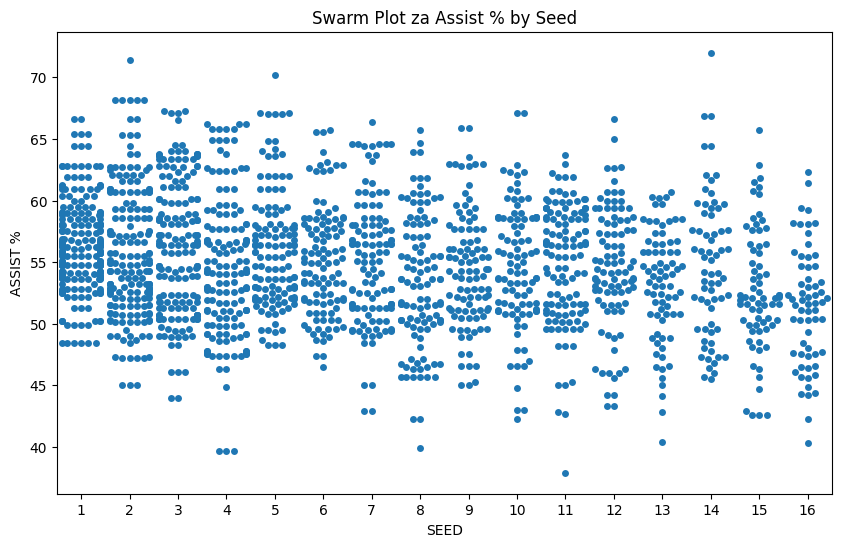

In [56]:
# Swarm plot for 'ASSIST %' by 'SEED'
plt.figure(figsize=(10, 6))
sns.swarmplot(x='SEED', y='ASSIST %', data=game_data)
plt.title('Swarm Plot za Assist % by Seed')
plt.show()

Swarm plot za 'ASSIST %' prema 'SEED' prikazuje raspored udjela asistencija za svako sjeme. Može pomoći u identifikaciji uzoraka distribucije udjela asistencija.